In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
from sympy import *


import gc
import timeit
import sys
import os

from random import normalvariate
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [3]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

## Plotting

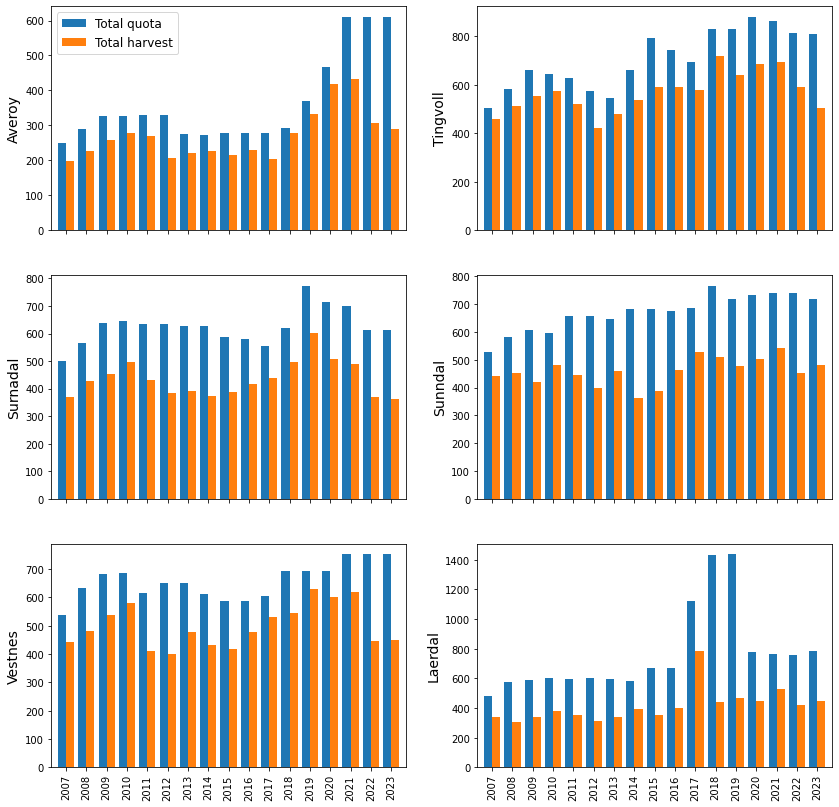

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

x = np.arange(17)
year_list = np.arange(17)
years = np.arange(2007,2024,1)
tot_quota = np.zeros((6,17))
tot_harvest = np.zeros((6,17))

width = 0.40
q = 0
for municipality in municipalities:
    [
    municipality,
    first_year,
    last_year,
    number_of_years,
    years,
    seen_deer_obs,
    seen_deer_obs_forest,
    seen_deer_obs_farmland,
    hinds_per_stag_obs,
    total_harvest,
    total_quota,
    fraction_female_calves_harvested,
    fraction_young_hinds_harvested,
    fraction_adult_hinds_harvested,
    fraction_male_calves_harvested,
    fraction_young_stags_harvested,
    fraction_adult_stags_harvested,
    spring_counts,
    ] = data_municipality[q] 
    
    tot_quota[q,:] = total_quota
    tot_harvest[q,:] = total_harvest
    
    q = q + 1
    
y1 = tot_quota[0]
y2 = tot_harvest[0]
axs[0,0].bar(x-0.2, y1, width) 
axs[0,0].bar(x+0.2, y2, width) 
axs[0,0].set_ylabel('Averoy', fontsize=14)
axs[0,0].set_xticklabels([])
axs[0,0].legend(["Total quota", "Total harvest"],loc="upper left",fontsize=12)
axs[0,0].set_xticks(year_list)
axs[0,0].margins(x=0.02, tight=True)

y1 = tot_quota[1]
y2 = tot_harvest[1]
axs[0,1].bar(x-0.2, y1, width) 
axs[0,1].bar(x+0.2, y2, width)
axs[0,1].set_ylabel('Tingvoll', fontsize=14)
axs[0,1].set_xticklabels([])
axs[0,1].set_xticks(year_list)
axs[0,1].margins(x=0.02, tight=True)

y1 = tot_quota[2]
y2 = tot_harvest[2]
axs[1,0].bar(x-0.2, y1, width) 
axs[1,0].bar(x+0.2, y2, width)
axs[1,0].set_ylabel('Surnadal', fontsize=14)
axs[1,0].set_xticklabels([])
axs[1,0].set_xticks(year_list)
axs[1,0].margins(x=0.02, tight=True)

y1 = tot_quota[3]
y2 = tot_harvest[3]
axs[1,1].bar(x-0.2, y1, width) 
axs[1,1].bar(x+0.2, y2, width) 
axs[1,1].set_ylabel('Sunndal', fontsize=14)
axs[1,1].set_xticklabels([])
axs[1,1].set_xticks(year_list)
axs[1,1].margins(x=0.02, tight=True)

y1 = tot_quota[4]
y2 = tot_harvest[4]
axs[2,0].bar(x-0.2, y1, width) 
axs[2,0].bar(x+0.2, y2, width) 
axs[2,0].set_ylabel('Vestnes', fontsize=14)
axs[2,0].set_xticks(year_list)
axs[2,0].set_xticklabels(years, rotation="vertical")
axs[2,0].margins(x=0.02, tight=True)


y1 = tot_quota[5]
y2 = tot_harvest[5]
axs[2,1].bar(x-0.2, y1, width) 
axs[2,1].bar(x+0.2, y2, width)
axs[2,1].set_ylabel('Laerdal', fontsize=14)
axs[2,1].set_xticks(year_list)
axs[2,1].set_xticklabels(years, rotation="vertical")
axs[2,1].margins(x=0.02, tight=True)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_S2.pdf", dpi=600, bbox_inches="tight")
pass;